# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils_paper import *

%matplotlib inline

# Conventional Flow Compensated Waveform

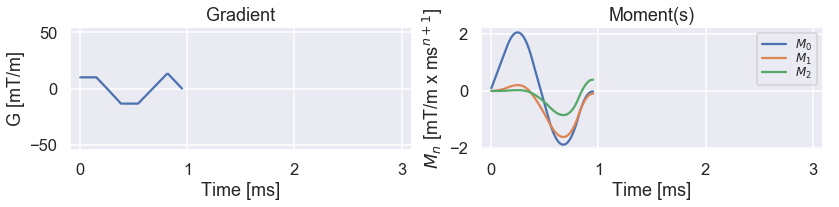

Flow Compensated Waveform:
Zero Gradient Moment = -0.02 mT/m x ms
First Gradient Moment = -0.10 mT/m x ms^2
Gradient waveform duration = 0.96 ms


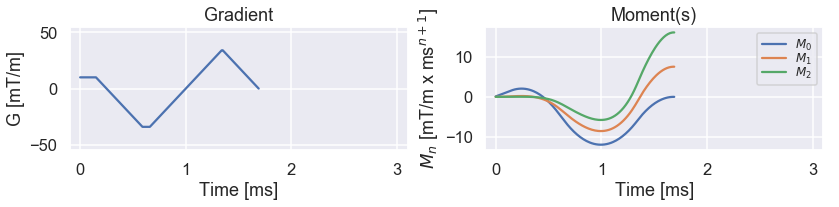

Flow Encoded Waveform (VENC=150cm/s):
Zero Gradient Moment = -0.00 mT/m x ms
First Gradient Moment = 7.51 mT/m x ms^2
Gradient waveform duration = 1.70 ms


In [9]:
# Start of parameters to change
G_Max = 50      # Maximum gradient amplitude, mT/m
SR_Max = 100    # Maximum slew rate, mT/m/ms 
g_ss = 10       # Slice select gradient amplitude, mT/m
p_ss = 0.15     # Slice select gradient plateau, ms
# End of parameters to change

params = {}
params['mode'] = 'free'
params['gmax'] = G_Max/1000
params['smax'] = SR_Max
params['dt']= 10e-6
params['g_ss']= g_ss
params['p_ss']= p_ss

FC, M0S, M1S, M2S, t_ss, G_ss = conventional_flowcomp(params)
mmt, axarr = plot_waveform_flow(FC, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=1)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('Flow Compensated Waveform:')
print('Zero Gradient Moment = %.2f mT/m x ms' % float(mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % float(mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % float(FC.size*params['dt']*1000))


# Flow Encoded Waveform
VENC = 1.5e-3   # Velocity ENCoding strength m/ms, equivalent to 150 cm/s
params['VENC'] = VENC
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
mmt, axarr = plot_waveform_flow(FE, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=1)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('Flow Encoded Waveform (VENC=150cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % (FE.size*params['dt']*1000))


# Conventional Flow Encoded Waveform with VENC = 20, 52 and 150 cm/s
The flow encoded waveform at VENC = 20cm/s has at least 1 trapezoid at the maximum gradient amplitude (50mT/m)

The flow encoded waveform at VENC = 52cm/s has at least 1 triangle at the maximum gradient amplitude (50mT/m)

The flow encoded waveform at VENC = 150cm/s has at least 1 triangle below the maximum gradient amplitude (50mT/m)

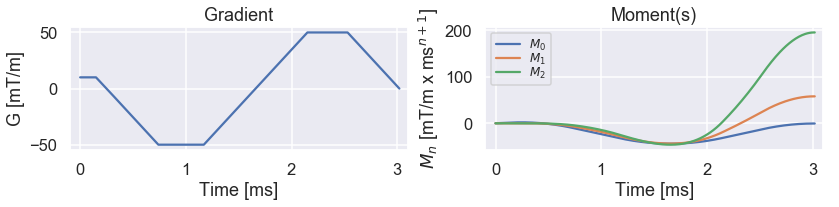

Flow Encoded Waveform (VENC=20cm/s):
Zero Gradient Moment = -0.46 mT/m x ms
First Gradient Moment = 58.05 mT/m x ms^2
Gradient waveform duration = 3.03 ms


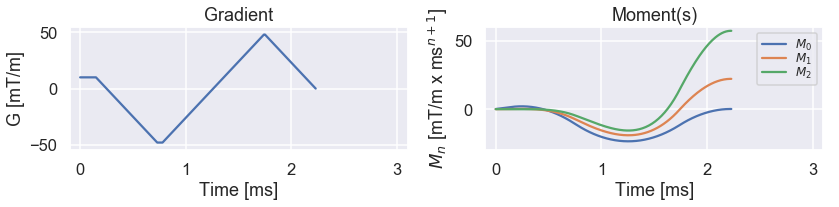

Flow Encoded Waveform (VENC=52cm/s):
Zero Gradient Moment = 0.12 mT/m x ms
First Gradient Moment = 22.08 mT/m x ms^2
Gradient waveform duration = 2.24 ms


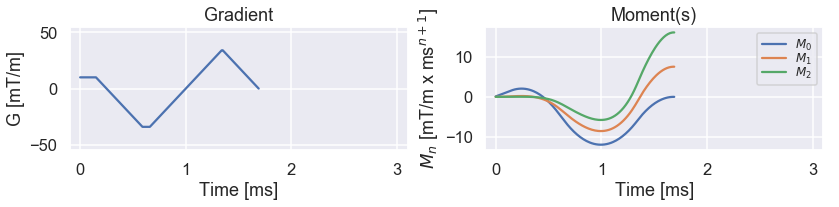

Flow Encoded Waveform (VENC=150cm/s):
Zero Gradient Moment = -0.00 mT/m x ms
First Gradient Moment = 7.51 mT/m x ms^2
Gradient waveform duration = 1.70 ms


In [12]:
VENC = 0.2e-3   # Velocity ENCoding strength m/ms, equivalent to 20 cm/s
params['VENC'] = VENC
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
mmt, axarr = plot_waveform_flow(FE, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('Flow Encoded Waveform (VENC=20cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % (FE.size*params['dt']*1000))


VENC = 0.52e-3   # Velocity ENCoding strength m/ms, equivalent to 52 cm/s
params['VENC'] = VENC
FE, DeltaM1 = conventional_flowencode(params)
mmt, axarr = plot_waveform_flow(FE, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
axarr[0,1].set_ylim(-30,60)
plt.show(plot_waveform_flow)
print('Flow Encoded Waveform (VENC=52cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % (FE.size*params['dt']*1000))


VENC = 1.5e-3   # Velocity ENCoding strength m/ms, equivalent to 150 cm/s
params['VENC'] = VENC
FE, DeltaM1 = conventional_flowencode(params)
mmt, axarr = plot_waveform_flow(FE, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('Flow Encoded Waveform (VENC=150cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % (FE.size*params['dt']*1000))


# Optimized Flow Compensated Waveform

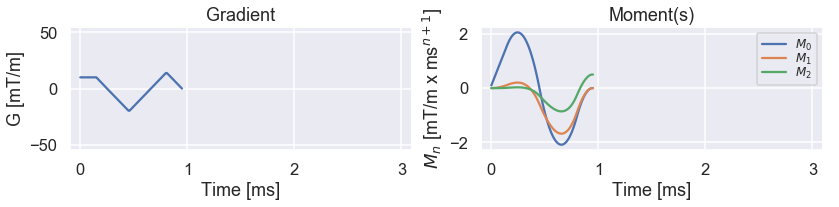

Flow Compensated Waveform:
Zero Gradient Moment = 0.00 mT/m x ms
First Gradient Moment = -0.00 mT/m x ms^2
Gradient waveform duration = 0.96 ms


In [13]:
# Start of parameters to change
dt = 10e-6      # Sampling rate, ms
G_Max = 50      # Maximum gradient amplitude, mT/m
SR_Max = 100    # Maximum slew rate, mT/m/ms 
g_ss = 10       # Slice select gradient amplitude, mT/m
p_ss = 0.15     # Slice select gradient plateau, ms
# End of parameters to change

params = {}
params['mode'] = 'free'
params['gmax'] = G_Max/1000
params['smax'] = SR_Max
params['dt']= dt
params['g_ss']= g_ss
params['p_ss']= p_ss

FC, M0S, M1S, M2S, t_ss, G_ss = conventional_flowcomp(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
GFC = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFC*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=1)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('Flow Compensated Waveform:')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFC.size*params['dt']*1000))


# Optimized Flow Encoded Waveform with VENC = 20, 52 and 150 cm/s
The flow encoded waveform at VENC = 20cm/s has at least 1 trapezoid at the maximum gradient amplitude (50mT/m)

The flow encoded waveform at VENC = 52cm/s has at least 1 triangle at the maximum gradient amplitude (50mT/m)

The flow encoded waveform at VENC = 150cm/s has at least 1 triangle below the maximum gradient amplitude (50mT/m)

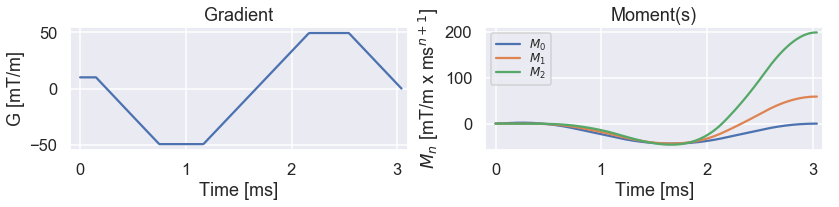



Flow Encoded Waveform (VENC=20cm/s):
Zero Gradient Moment = 0.00 mT/m x ms
First Gradient Moment = 58.73 mT/m x ms^2
Gradient waveform duration = 3.05 ms


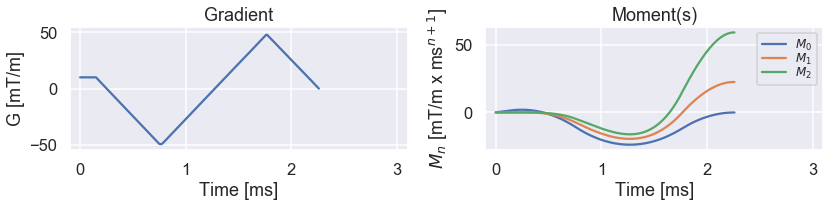



Flow Encoded Waveform (VENC=52cm/s):
Zero Gradient Moment = 0.00 mT/m x ms
First Gradient Moment = 22.59 mT/m x ms^2
Gradient waveform duration = 2.27 ms


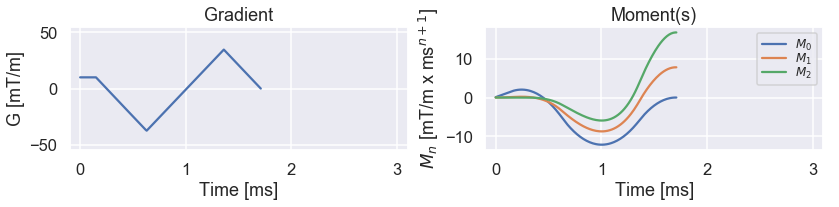



Flow Encoded Waveform (VENC=150cm/s):
Zero Gradient Moment = 0.00 mT/m x ms
First Gradient Moment = 7.83 mT/m x ms^2
Gradient waveform duration = 1.72 ms


In [15]:
params['VENC'] = 0.2e-3   # m/ms, equivalent to 20 cm/s
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S+DeltaM1, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
GFE = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFE*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('\n')
print('Flow Encoded Waveform (VENC=20cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFE.size*params['dt']*1000))


params['VENC'] = 0.52e-3   # m/ms, equivalent to 52 cm/s
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S+DeltaM1, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
GFE = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFE*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('\n')
print('Flow Encoded Waveform (VENC=52cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFE.size*params['dt']*1000))


params['VENC'] = 1.5e-3   # m/ms, equivalent to 150 cm/s
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S+DeltaM1, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
GFE = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFE*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
plt.show(plot_waveform_flow)
print('\n')
print('Flow Encoded Waveform (VENC=150cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFE.size*params['dt']*1000))

# Optimized Asymmetric Veolcity Encoding
Alpha is not fixed, rather it's value is determined by running the optimization for all values of alpha

alpha = 0.000000
Gradient waveform duration = 1.37 ms
Gradient waveform duration = 1.48 ms


alpha = 0.005000
Gradient waveform duration = 1.37 ms
Gradient waveform duration = 1.48 ms


alpha = 0.010000
Gradient waveform duration = 1.38 ms
Gradient waveform duration = 1.48 ms


alpha = 0.015000
Gradient waveform duration = 1.38 ms
Gradient waveform duration = 1.48 ms


alpha = 0.020000
Gradient waveform duration = 1.39 ms
Gradient waveform duration = 1.47 ms


alpha = 0.025000
Gradient waveform duration = 1.40 ms
Gradient waveform duration = 1.47 ms


alpha = 0.030000
Gradient waveform duration = 1.40 ms
Gradient waveform duration = 1.47 ms


alpha = 0.035000
Gradient waveform duration = 1.41 ms
Gradient waveform duration = 1.47 ms


alpha = 0.040000
Gradient waveform duration = 1.41 ms
Gradient waveform duration = 1.46 ms


alpha = 0.045000
Gradient waveform duration = 1.42 ms
Gradient waveform duration = 1.46 ms


alpha = 0.050000
Gradient waveform duration = 1.42 ms
Gradient wavefor

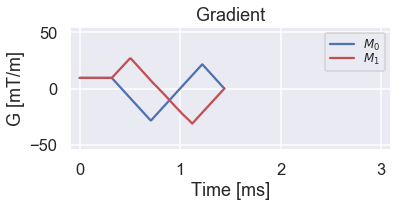

In [17]:
# Start of parameters to change
dt = 10e-6      # Sampling rate, ms
G_Max = 50      # Maximum gradient amplitude, mT/m
SR_Max = 100    # Maximum slew rate, mT/m/ms 
g_ss = 9.5      # Slice select gradient amplitude, mT/m
p_ss = 0.32     # Slice select gradient plateau, ms
GAM = 2*np.pi*42.57         # 1/(s*T)
# End of parameters to change

pol = 1         # Controls the polarity of the slice select gradient for one encoding experiment

for i in np.linspace(0,0.5,101):

    alpha = i
    print('alpha = %1f' % (alpha) )
    
    params = {}
    params['mode'] = 'free'
    params['gmax'] = G_Max/1000
    params['smax'] = SR_Max
    params['dt']= dt
    params['g_ss']= g_ss
    params['p_ss']= p_ss
    params['VENC'] = 1.5e-3   # m/ms
    M0S, M1S, M2S, t_ss, G_ss = slice_select_bridge(params)
    params['M0S'] = M0S
    params['M1S'] = M1S
    params['G_ss'] = G_ss
    DeltaM1 = np.pi/(GAM*params['VENC'])  # mT/m * ms^2
    params['gfix'] = [pol*g_ss/1000, 0]
    params['moment_params'] =     [[0, 0, t_ss, -1, -1, -1*pol*M0S, 1.0e-4]]
    params['moment_params'].append([0, 1, t_ss, -1, -1, -1*pol*M1S+(DeltaM1*alpha), 1.0e-4])
    G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
    GFE1 = np.concatenate((pol*G_ss,G),axis=0)
    print('Gradient waveform duration = %.2f ms' % float(GFE1.size*params['dt']*1000))

    params = {}
    params['mode'] = 'free'
    params['gmax'] = G_Max/1000
    params['smax'] = SR_Max
    params['dt']= dt
    params['g_ss']= g_ss
    params['p_ss']= p_ss
    params['VENC'] = 1.5e-3   # m/ms
    M0S, M1S, M2S, t_ss, G_ss = slice_select_bridge(params)
    params['M0S'] = M0S
    params['M1S'] = M1S
    params['G_ss'] = G_ss
    DeltaM1 = np.pi/(GAM*params['VENC'])  # mT/m * ms^2
    params['gfix'] = [g_ss/1000, 0]
    params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
    params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S-(DeltaM1*(1-alpha)), 1.0e-4])
    G, T = get_min_TE_free(params, 0.1, 5, verbose=0)
    GFE2 = np.concatenate((G_ss,G),axis=0)
    print('Gradient waveform duration = %.2f ms' % float(GFE2.size*params['dt']*1000))
    print('\n')

    if (GFE1.size*params['dt']*1000 == GFE2.size*params['dt']*1000):
        break
    
axarr = plot_waveform_flow_overlap(GFE1*1000, GFE2*1000, params['dt'], 2, plot_moments = False, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=1)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
plt.show(plot_waveform_flow)
